In [1]:
import pandas as pd
from matplotlib import colors
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append("..")
from config import *
from scripts.measurement_devices import *
import matplotlib.cm as cm
from scripts.run_active_learning import *
from scripts.plotting_MAE import *
import matplotlib.cm as cm
import os

In [2]:
file_paths_uncertainty = [
    MAE_PRIORS_10272, MAE_PRIORS_10275,
    MAE_PRIORS_10304, MAE_PRIORS_10311,
    MAE_PRIORS_10374, MAE_PRIORS_10399,
    MAE_PRIORS_10402, MAE_PRIORS_10403
]


dataset_paths = [
    MAE_PRIORS_10272_sawei, MAE_PRIORS_10275_sawei,
    MAE_PRIORS_10304_sawei, MAE_PRIORS_10311_sawei,
    MAE_PRIORS_10374_sawei, MAE_PRIORS_10399_sawei,
    MAE_PRIORS_10402_sawei, MAE_PRIORS_10403_sawei
]

dataset_labels = [
    "10272", "10275", "10304", "10311",
    "10374", "10399", "10402", "10403"
]


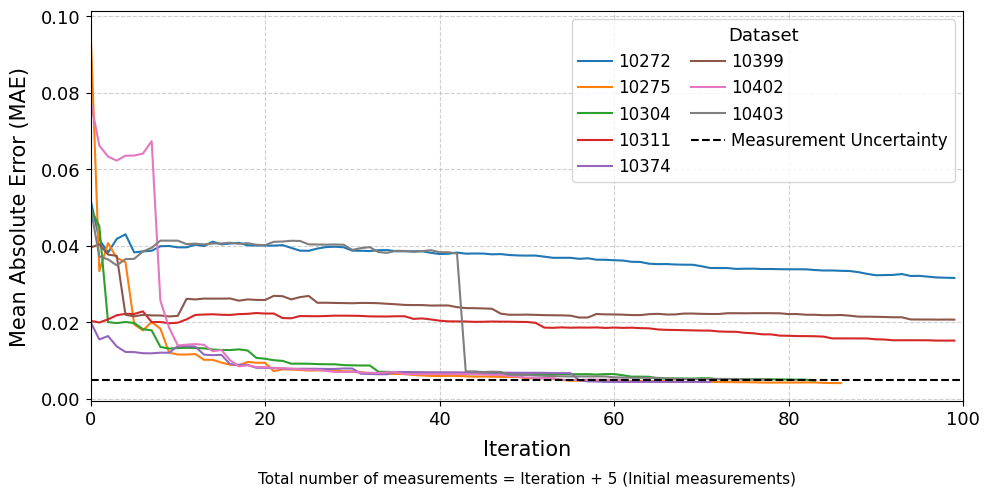

In [3]:
base_dir = MAE_PLOT
filename = "sawei_Centroids_saturation_low.pdf"
save_path = os.path.join(base_dir, filename)

plot_strategy_across_datasets(
    strategy="Centroids_saturation_low",
    dataset_paths=dataset_paths,
    dataset_labels=dataset_labels,
    save_path=save_path,
    measurement_uncertainty=0.005,
)


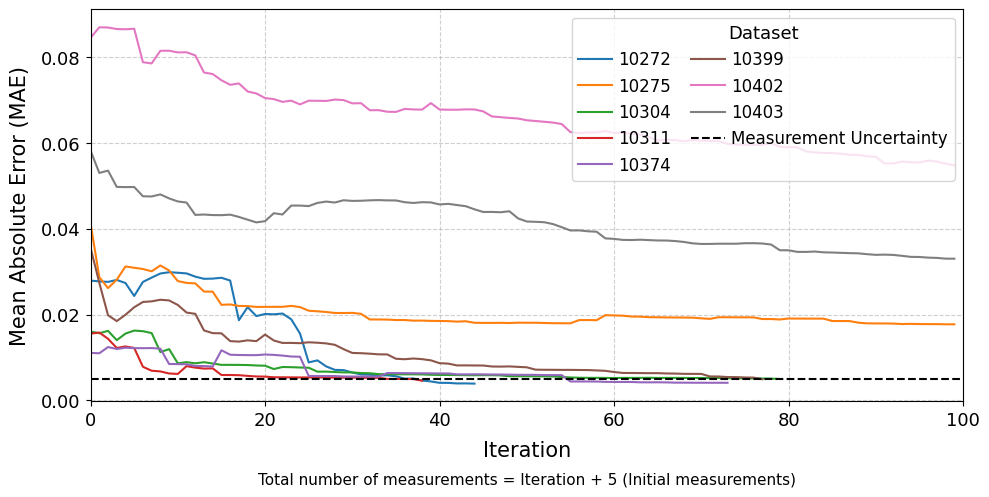

In [4]:
base_dir = MAE_PLOT
filename = "uncertainty_K-Center.pdf"
save_path = os.path.join(base_dir, filename)

plot_strategy_across_datasets(
    strategy="K-Center",
    dataset_paths=file_paths_uncertainty,
    dataset_labels=dataset_labels,
    save_path=save_path,
    measurement_uncertainty=0.005,
)

In [5]:
json_path = os.path.join(DATA_CLEAN_InIT_CHOICES, "10374_indices.json")
with open(json_path, "r") as f:
    init_choices = json.load(f)
            

 c:\Users\doaam\Downloads\PhD\Cold active learning\multimodal_active_learning_ccss\notebook\..\scripts\plotting_MAE.py:433: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


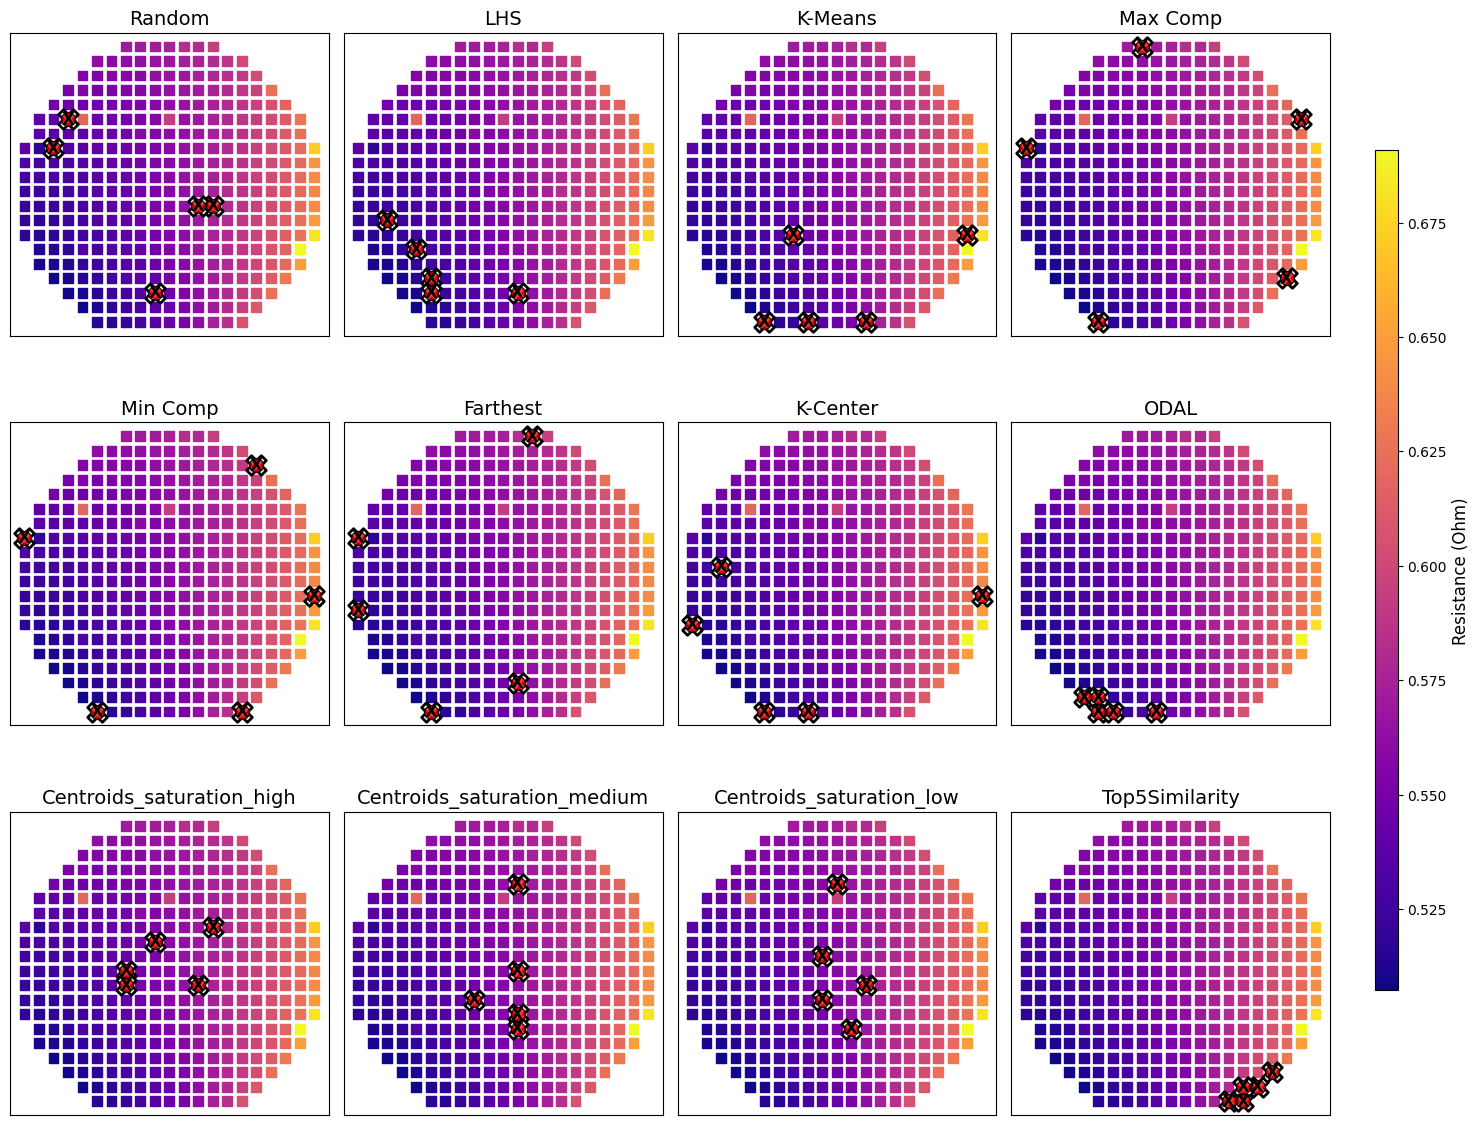

In [11]:
strategy_order = [
    "Random", "LHS", "K-Means","Max Comp", "Min Comp","Farthest", "K-Center", "ODAL", "Centroids_saturation_high",
    "Centroids_saturation_medium", "Centroids_saturation_low","Top5Similarity"    
]

base_dir = MAE_PLOT
filename = "initialization_strategies_10374.pdf"
save_path = os.path.join(base_dir, filename)

plot_initialization_strategies(csv_path=DATASET_10374_Ir_Pd_Pt_Rh_Ru, 
    all_init_strategies=init_choices, strategy_order=strategy_order, output_path=save_path)

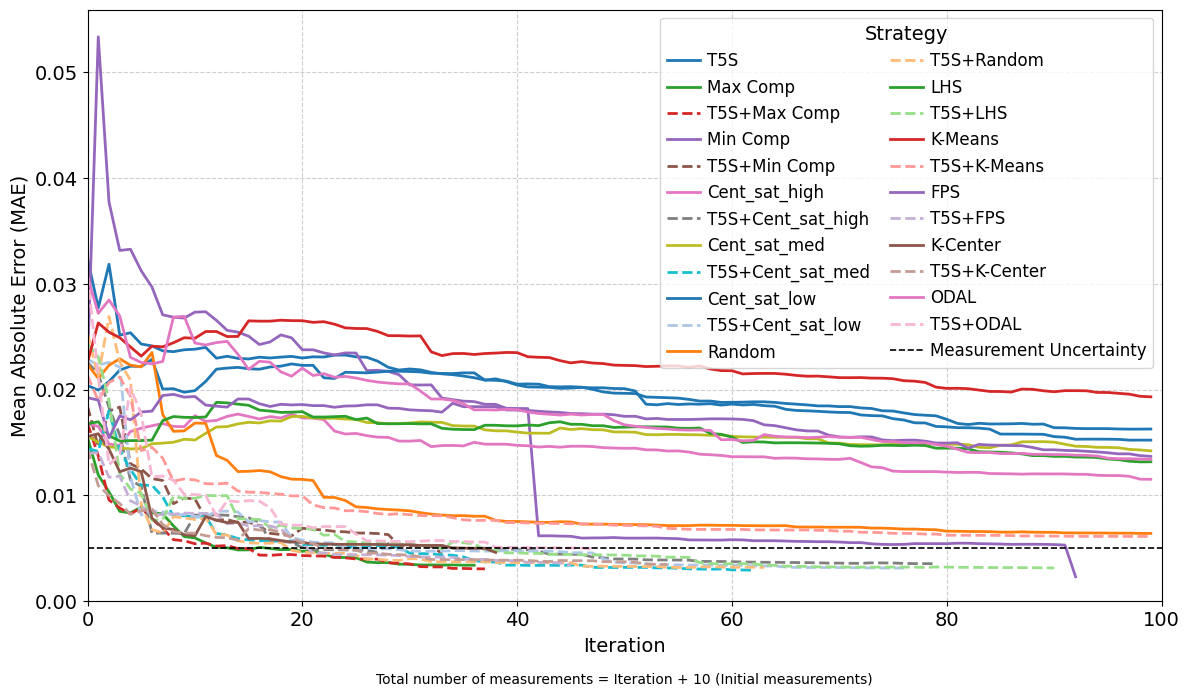

In [7]:
base_dir = MAE_PLOT
filename = "Top5Similarity-10311_uncertainty.pdf"
save_path = os.path.join(base_dir, filename)

df = pd.read_csv(MAE_PRIORS_10311)

plot_all_base_and_mixed_strategies(df, main_strategy="Top5Similarity", save_path=save_path ,base_strategies=base_strategies)


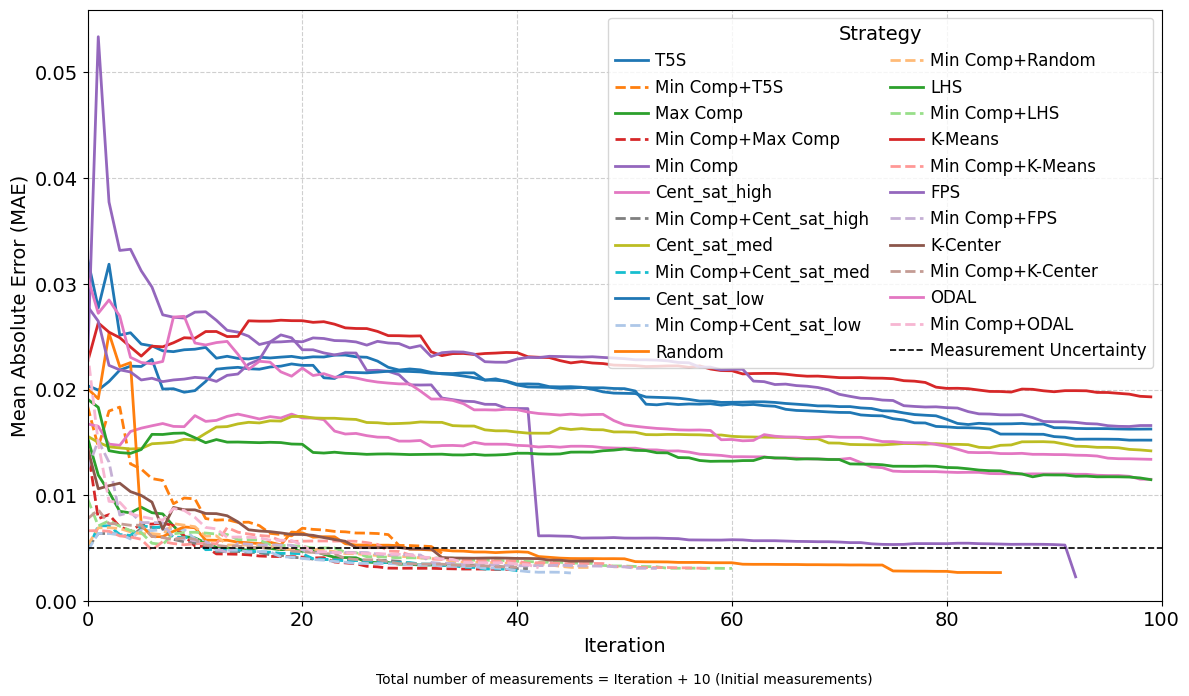

In [8]:
base_dir = MAE_PLOT
filename = "Min Comp-10311_sawei.pdf"
save_path = os.path.join(base_dir, filename)
df = pd.read_csv(MAE_PRIORS_10311_sawei)
plot_all_base_and_mixed_strategies(df, main_strategy="Min Comp", save_path=save_path,base_strategies=base_strategies)

Saved plot to: C:\Users\doaam\Downloads\PhD\Cold active learning\multimodal_active_learning_ccss\data\results\MAE_plot\Min Comp-10311_even_space.pdf


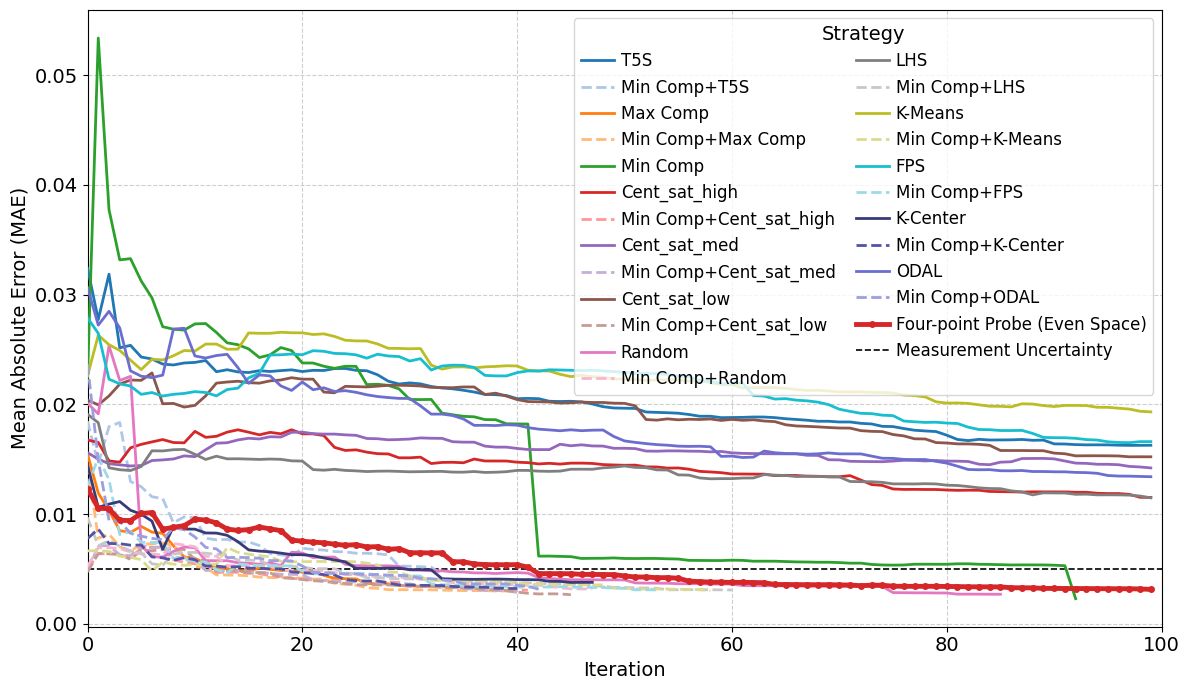

In [9]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# ==== Define Constants ====
base_dir = MAE_PLOT
dataset_path = DATASET_10311_Au_Pd_Pt_Rh_Ru_RT
dataset_name = os.path.splitext(os.path.basename(dataset_path))[0]
output_dir = os.path.join(EVENLY_PATH_Sawei, dataset_name)

# ==== Read Data ====
# 1. Read the existing MAE results (for other strategies)
df = pd.read_csv(MAE_PRIORS_10311_sawei)

# 2. Read even_space MAE (from GPSawei run)
even_space_mae_path = os.path.join(output_dir, "mae_history_GPSawei.csv")
even_space_mae_df = pd.read_csv(even_space_mae_path)

# 3. Add even_space to a copy of the original DataFrame
df_with_even_space = df.iloc[:len(even_space_mae_df)].copy()
df_with_even_space["even_space"] = even_space_mae_df["MAE"].values

# 4. Display name mapping
STRATEGY_DISPLAY_NAMES["even_space"] = "Four-point Probe (Even Space)"


# 5. Add even_space to base_strategies
base_strategies_with_even_space = base_strategies + ["even_space"]

# 6. Save path
filename = "Min Comp-10311_even_space.pdf"
save_path = os.path.join(base_dir, filename)

# ==== Plotting Function ====

def get_large_color_palette(n):
    from matplotlib.cm import tab20, tab20b, tab20c
    palette = tab20.colors + tab20b.colors + tab20c.colors
    return palette[:n]


def plot_all_base_and_mixed_strategies(df, main_strategy, base_strategies, save_path=None, measurement_uncertainty=0.005):
    strategies_to_plot = []
    labels = []
    styles = []

    full_strategy_list = []

    for base in base_strategies:
        full_strategy_list.append(base)
        full_strategy_list.append(f"{main_strategy}+{base}")

    color_palette = get_large_color_palette(len(full_strategy_list))
    color_map = dict(zip(full_strategy_list, color_palette))

    for base in base_strategies:
        base_label = STRATEGY_DISPLAY_NAMES.get(base, base)
        mixed_label = f"{STRATEGY_DISPLAY_NAMES.get(main_strategy, main_strategy)}+{base_label}"

        if base in df.columns:
            strategies_to_plot.append(base)
            labels.append(base_label)

            # Special style for even_space
            if base == "even_space":
                styles.append(("solid", "#d62728"))  # bold red
            else:
                styles.append(("solid", color_map[base]))

        mixed_name = f"{main_strategy}+{base}"
        if mixed_name in df.columns:
            strategies_to_plot.append(mixed_name)
            labels.append(mixed_label)
            styles.append(("dashed", color_map[mixed_name]))

    if not strategies_to_plot:
        print("No matching strategies found in the data.")
        return

    fig, ax = plt.subplots(figsize=(12, 7))
    iterations = list(range(100))

    for strategy, label, (linestyle, color) in zip(strategies_to_plot, labels, styles):
        raw_values = df[strategy] if strategy in df.columns else pd.Series([None]*100)
        interpolated = raw_values.interpolate(limit_direction='both')
        values = interpolated.mask(raw_values.isna()).values[:100]

        is_even_space = (strategy == "even_space")

        ax.plot(
            iterations[:len(values)],
            values,
            label=label,
            color=color,
            linestyle=linestyle,
            linewidth=3.5 if is_even_space else 2,
            marker='o' if is_even_space else None,
            markersize=4 if is_even_space else 0,
            zorder=10 if is_even_space else 5
        )

    # Measurement uncertainty line
    ax.axhline(
        y=measurement_uncertainty,
        color='black',
        linestyle='--',
        linewidth=1.2,
        label='Measurement Uncertainty'
    )

    # Axis, labels, legend
    ax.set_xlabel("Iteration", fontsize=14)
    ax.set_ylabel("Mean Absolute Error (MAE)", fontsize=14)
    ax.tick_params(axis='both', labelsize=14)
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.set_xlim([0, 100])

    ax.legend(
        title="Strategy",
        fontsize=12,
        title_fontsize=14,
        loc='upper right',
        bbox_to_anchor=(1.0, 1.0),
        ncol=2,
        frameon=True,
        handletextpad=0.4,
        columnspacing=1.2
    )

    plt.tight_layout()

    if save_path:
        if not save_path.endswith(".pdf"):
            save_path = save_path.rsplit('.', 1)[0] + ".pdf"
        plt.savefig(save_path, format='pdf', bbox_inches='tight', pad_inches=0.1)
        print(f"Saved plot to: {save_path}")
    else:
        plt.show()


# ==== Plot It ====

plot_all_base_and_mixed_strategies(
    df=df_with_even_space,
    main_strategy="Min Comp",
    base_strategies=base_strategies_with_even_space,
    save_path=save_path
)

Saved plot to: C:\Users\doaam\Downloads\PhD\Cold active learning\multimodal_active_learning_ccss\data\results\MAE_plot\Top5Similarity-10311_even_space.pdf


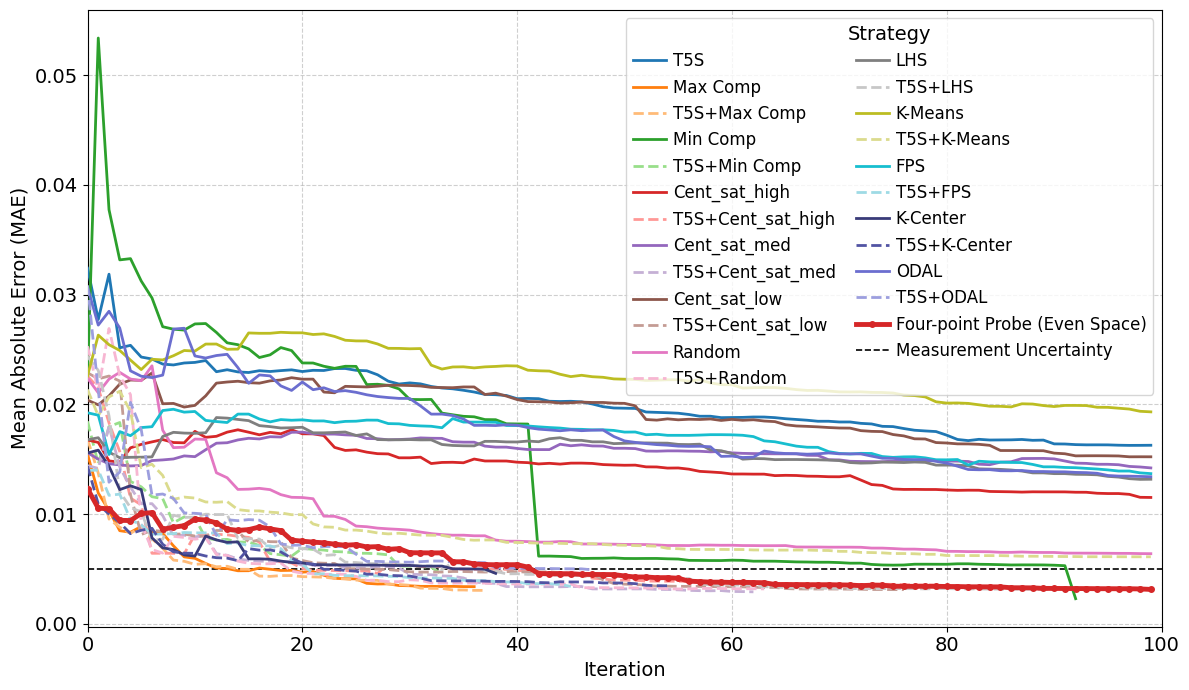

In [10]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# ==== Define Constants ====
base_dir = MAE_PLOT
dataset_path = DATASET_10311_Au_Pd_Pt_Rh_Ru_RT
dataset_name = os.path.splitext(os.path.basename(dataset_path))[0]
output_dir = os.path.join(EVENLY_PATH_Uncertainty, dataset_name)

# ==== Read Data ====
# 1. Read the existing MAE results (for other strategies)
df = pd.read_csv(MAE_PRIORS_10311)

# 2. Read even_space MAE (from GPBasic run)
even_space_mae_path = os.path.join(output_dir, "mae_history_GPBasic.csv")
even_space_mae_df = pd.read_csv(even_space_mae_path)

# 3. Add even_space to a copy of the original DataFrame
df_with_even_space = df.iloc[:len(even_space_mae_df)].copy()
df_with_even_space["even_space"] = even_space_mae_df["MAE"].values

# 4. Display name mapping
STRATEGY_DISPLAY_NAMES["even_space"] = "Four-point Probe (Even Space)"


# 5. Add even_space to base_strategies
base_strategies_with_even_space = base_strategies + ["even_space"]

# 6. Save path
filename = "Top5Similarity-10311_even_space.pdf"
save_path = os.path.join(base_dir, filename)

# ==== Plotting Function ====

def get_large_color_palette(n):
    from matplotlib.cm import tab20, tab20b, tab20c
    palette = tab20.colors + tab20b.colors + tab20c.colors
    return palette[:n]


def plot_all_base_and_mixed_strategies(df, main_strategy, base_strategies, save_path=None, measurement_uncertainty=0.005):
    strategies_to_plot = []
    labels = []
    styles = []

    full_strategy_list = []

    for base in base_strategies:
        full_strategy_list.append(base)
        full_strategy_list.append(f"{main_strategy}+{base}")

    color_palette = get_large_color_palette(len(full_strategy_list))
    color_map = dict(zip(full_strategy_list, color_palette))

    for base in base_strategies:
        base_label = STRATEGY_DISPLAY_NAMES.get(base, base)
        mixed_label = f"{STRATEGY_DISPLAY_NAMES.get(main_strategy, main_strategy)}+{base_label}"

        if base in df.columns:
            strategies_to_plot.append(base)
            labels.append(base_label)

            # Special style for even_space
            if base == "even_space":
                styles.append(("solid", "#d62728"))  # bold red
            else:
                styles.append(("solid", color_map[base]))

        mixed_name = f"{main_strategy}+{base}"
        if mixed_name in df.columns:
            strategies_to_plot.append(mixed_name)
            labels.append(mixed_label)
            styles.append(("dashed", color_map[mixed_name]))

    if not strategies_to_plot:
        print("No matching strategies found in the data.")
        return

    fig, ax = plt.subplots(figsize=(12, 7))
    iterations = list(range(100))

    for strategy, label, (linestyle, color) in zip(strategies_to_plot, labels, styles):
        raw_values = df[strategy] if strategy in df.columns else pd.Series([None]*100)
        interpolated = raw_values.interpolate(limit_direction='both')
        values = interpolated.mask(raw_values.isna()).values[:100]

        is_even_space = (strategy == "even_space")

        ax.plot(
            iterations[:len(values)],
            values,
            label=label,
            color=color,
            linestyle=linestyle,
            linewidth=3.5 if is_even_space else 2,
            marker='o' if is_even_space else None,
            markersize=4 if is_even_space else 0,
            zorder=10 if is_even_space else 5
        )

    # Measurement uncertainty line
    ax.axhline(
        y=measurement_uncertainty,
        color='black',
        linestyle='--',
        linewidth=1.2,
        label='Measurement Uncertainty'
    )

    # Axis, labels, legend
    ax.set_xlabel("Iteration", fontsize=14)
    ax.set_ylabel("Mean Absolute Error (MAE)", fontsize=14)
    ax.tick_params(axis='both', labelsize=14)
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.set_xlim([0, 100])

    ax.legend(
        title="Strategy",
        fontsize=12,
        title_fontsize=14,
        loc='upper right',
        bbox_to_anchor=(1.0, 1.0),
        ncol=2,
        frameon=True,
        handletextpad=0.4,
        columnspacing=1.2
    )

    plt.tight_layout()

    if save_path:
        if not save_path.endswith(".pdf"):
            save_path = save_path.rsplit('.', 1)[0] + ".pdf"
        plt.savefig(save_path, format='pdf', bbox_inches='tight', pad_inches=0.1)
        print(f"Saved plot to: {save_path}")
    else:
        plt.show()


# ==== Plot It ====

plot_all_base_and_mixed_strategies(
    df=df_with_even_space,
    main_strategy="Top5Similarity",
    base_strategies=base_strategies_with_even_space,
    save_path=save_path
)